In [1]:
import pymongo

client = pymongo.MongoClient()
db = client.snrm
doc_coll = db.docs
query_coll = db.queries

In [4]:
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize

StopWords = set(stopwords.words('english') + list(string.punctuation))

def my_tokenize(title):
    """ tokenize word """
    title = title.lower()
    words = []
    for word in word_tokenize(title):
        for w in word.split("/"):
            for w2 in w.split("-"):
                if w2 in StopWords:
                    continue
                words.append(w2)
    return words

In [5]:
max_q_len = 0
for q in query_coll.find({}):
    q_len = len(my_tokenize(q["title"]))
    if q_len > max_q_len:
        max_q_len = q_len
print("max_q_len:", max_q_len)

max_q_len: 4


In [6]:
docs = []
for doc in doc_coll.find():
    docs.append(doc)

In [7]:
lens = []

min_len = 100000000000
max_len = 0
sum_len = 0

In [8]:
for i, doc in enumerate(docs):
    if i % 100000 == 0:
        print(i, doc["docNo"])
    length = len(doc["tokens"])

    sum_len += length
    if length < min_len:
        min_len = length

    if length > max_len:
        max_len = length
    
    lens.append(length)

0 FBIS3-1
100000 FBIS4-38423
200000 FT921-960
300000 FT933-11752
400000 LA011289-0197
500000 LA101790-0031


In [9]:
print('min_len:', min_len)
print('max_len:', max_len)
print('avg_len:', sum_len/len(docs))

min_len: 0
max_len: 162779
avg_len: 260.8940386818264


In [10]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/fanyixing/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


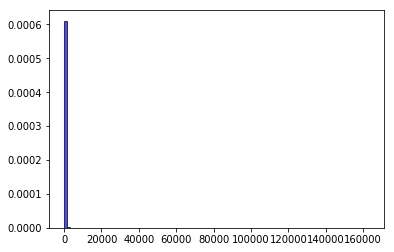

In [12]:
plt.hist(lens, bins=100, normed=1, facecolor="blue", edgecolor="black", alpha=0.7)
plt.show()

In [14]:
(np.array(lens) == 0).sum()  # 本身有4291的数据token长度为0

4291

In [27]:
new_data = np.array(lens) * (np.array(lens) < 2000)

/home/fanyixing/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


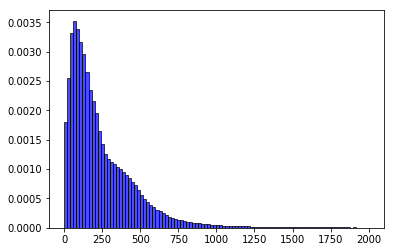

In [28]:
plt.hist(new_data, bins=100, normed=1, facecolor="blue", edgecolor="black", alpha=0.7)
plt.show()

In [29]:
(new_data == 0).sum()

6186